### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of points (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use a cloud GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [2]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1 and HA2):

In [3]:
NAME1 = "Anthon Odengard"
NAME2 = ""
GROUP = ""

### Check Python version

In [4]:
from platform import python_version_tuple

assert (
    python_version_tuple()[:2] == ("3", "11")
), "You are not running Python 3.11. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [5]:
import os

nb_dirname = os.path.abspath("")
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in [
    "IHA1",
    "IHA2",
    "HA1",
    "HA2",
], "[ERROR] The notebook appears to have been moved from its original directory"

### Verify correct nb_fname

In [6]:
from IPython.display import HTML, display

try:
    display(
        HTML(
            r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(
                nb_fname=nb_fname
            )
        )
    )
except NameError:
    assert False, "Make sure to fill in the nb_fname variable above!"

### Verify that your notebook is up-to-date and not corrupted in any way

In [7]:
import sys

sys.path.append("..")
from ha_utils import check_notebook_uptodate_and_not_corrupted

check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/dml-cth/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](https://upload.wikimedia.org/wikipedia/en/4/46/Pokemon_Go.png)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a different and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall). To download the dataset you will need a Kaggle account. This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall).

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's longitude and latitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration

Feel free to temporarily add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The Python docs](https://docs.python.org/3/), [PyTorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

To pass this assignment, your solutions should pass all tests (`assert`-statements). Note that the tests shown to you are not exhaustive, and additional hidden tests exist for some of the tasks. Further, similar to IHA1, this notebook contains some questions where we ask you to reflect upon some results. These questions will not be graded in detail, but we still expect you to answer them.

## 0. Imports

Import any necessary modules here.

In [8]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three Pokémon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, either use [this link](https://www.kaggle.com/semioniy/predictemall) to do so (and place the file in the same folder as this notebook), or simply run the cell below. You might have to [create a new API token](https://www.kaggle.com/settings/account) before the commands work.

In [9]:
!kaggle datasets download -d semioniy/predictemall
!unzip -u predictemall.zip
!rm -rf predictemall.zip 300k_arff 300k.arff 300k_csv

Dataset URL: https://www.kaggle.com/datasets/semioniy/predictemall
License(s): unknown
100%|████████████████████████████████████████| 140M/140M [00:05<00:00, 28.6MB/s]
100%|████████████████████████████████████████| 140M/140M [00:05<00:00, 27.6MB/s]
Archive:  predictemall.zip
  inflating: 300k.arff               
  inflating: 300k_arff/300k.arff     
  inflating: 300k_csv/300k.csv       


In [10]:
# TODO: load the dataset using pandas to a dataframe called df
df_hist = pd.read_csv('300k.csv', low_memory=False)
df = pd.read_csv('300k.csv', low_memory=False)

In [11]:
assert df.shape == (
    296021,
    208,
), f"Dataframe has not the right shape. {df.shape} != (296021, 208)"
assert isinstance(df, pd.DataFrame), f"df is not a dataframe. Was {type(df)}"

Modify `df` to only have the columns `latitude`, `longitude`, and `class`.

In [12]:
df = df.loc[:, ['latitude', 'longitude', 'class']]

In [13]:
assert len(df.columns) == 3, "There should be 3 columns"
assert len(df.shape) == 2, "The dataframe should be 2 dimensional"
assert df.shape == (296021, 3), "Wrong shape of the dataframe"
assert "latitude" in df.columns, "latitude column is missing"
assert "longitude" in df.columns, "longitude column is missing"
assert "class" in df.columns, "class column is missing"

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For your convenience, we provide the dictionary `name_dict` to convert between ids and names (we'll do this soon).

In [14]:
from utils import name_dict

In [15]:
# example usage (you can index either by name or id)
print(name_dict["Gengar"])
print(name_dict[94])

94
Gengar


In [16]:
# for convenience, let's add a new column to the dataframe with the name of the pokemon
df["name"] = df["class"].apply(lambda x: name_dict[x])
print(df.head())

    latitude   longitude  class    name
0  20.525745  -97.460829     16  Pidgey
1  20.523695  -97.461167    133   Eevee
2  38.903590  -77.199780     16  Pidgey
3  47.665903 -122.312561     13  Weedle
4  47.666454 -122.311628    133   Eevee


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://www.pokemon.com/static-assets/content-assets/cms2/img/pokedex/full/128.png></td>
  </tr>
</table>



Filter the dataset to contain only these three types of pokemon and save it in the DataFrame `filtered_df`.

In [20]:
names = ['Diglett', 'Seel', 'Tauros']
filtered_df = df[df.name.isin(names)]
df_hist["name"] = df_hist["class"].apply(lambda x: name_dict[x])
print(
    f"We have {len(filtered_df)} instances of Diglett, Seel, and Tauros in the dataset."
)

We have 2083 instances of Diglett, Seel, and Tauros in the dataset.


In [21]:
assert len(np.unique(filtered_df["class"])) == 3, "There should be 3 unique classes."
assert filtered_df.shape == (
    2083,
    4,
), "The shape of the filtered dataframe is incorrect."

In an earlier cell, you could see that the dataset has 208 features per pokemon sighting (`df.shape == (296021, 208)`). Why do we only use the `longitude` and `latitude` features and not all the features? 

**Your answer:** We aim to determine the best vacation destination to catch the remaining Pokémon. Longitude and latitude is the most relevant parameters.


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a bar chart of the number of occurrences of each class.

<Axes: xlabel='name'>

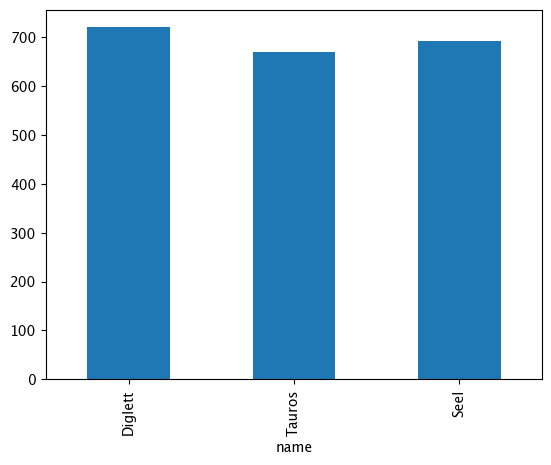

In [22]:
filtered_df['name'].value_counts(sort=False).plot.bar()

Is the dataset balanced? Why/why not? Why is this important?

**Your answer:** Yes, the dataset seems balanced. This is important due to the fact that we want all the classes to have equal "weight" in the training process. I.e. we dont want any bias toward a majority classes.

Plot a scatter plot where the first dimension is longitude, the second is latitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

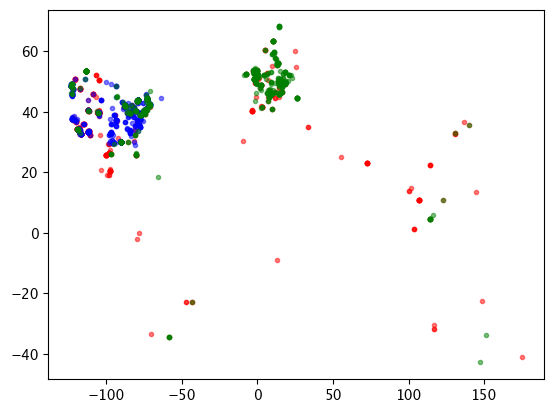

In [23]:
latitude = filtered_df['latitude']
longitude = filtered_df['longitude']
pokemons = filtered_df['name'].unique()
colors=['r', 'b', 'g']
markers = []

for name, color in zip(pokemons, colors):
    subset = filtered_df[filtered_df['name'] == name]
    plt.scatter(subset['longitude'], subset['latitude'], c=color, label=name, alpha=0.5, marker='.')

Is there any other visualization you think would be useful? If so, insert them here.

In [24]:
# YOUR CODE HERE

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** There appears to be significant overlap among most of the classes. However, the cluster on the far left seems to pose the most considerable challenge, likely creating the biggest issue.

Which accuracy do you expect to achieve?

**Your answer:** It is challenging to make a precise assessment of the model's performance, but there is observable separation between classes. This suggests that the model's performance should be significantly better than random guessing.



## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. We will use some PyTorch utilities to help us with this task.

Start by creating the input and output vectors, `x` and `y`. The input should be latitude and longitude, and the output should be the class of the pokemon. Note that you cannot use the class names directly, as they are strings. You need to introduce some mapping to convert them to integers (0, 1, and 2) or one-hot vectors.

In [25]:
x = np.array(filtered_df.loc[:,['latitude', 'longitude']]).astype('float32')
encoding_dict = {'Diglett': 0, 'Seel':1, 'Tauros':2}

y = np.array(filtered_df['name'].apply(lambda x: encoding_dict[x]))



print(f"Shape of input data: {x.shape}")
print(f"Shape of labels: {y.shape}")

Shape of input data: (2083, 2)
Shape of labels: (2083,)


In [26]:
assert isinstance(x, np.ndarray), "x should be a numpy array"
assert isinstance(y, np.ndarray), "y should be a numpy array"

assert x.shape[0] == y.shape[0], "x and y should have the same number of samples"
assert x.shape[-1] == 2, "x should have 2 features"
assert x.dtype == np.float32, "x should be of type float32"
if y.shape[-1] == 3:  # one-hot encoded
    assert y.max() == 1, "one-hot encoded y, at least one entry should be 1"
    assert y.min() == 0, "one-hot encoded y, at least one entry should be 0"
    assert y.sum(axis=1).all() == 1
else:  # label encoded
    assert y.max() == 2, "label encoded y, should have a max value of 2"
    assert y.min() == 0, "label encoded y, should have a min value of 0"

Separate your data into training (55%), validation (25%) and test sets (20%) and save them as `dataset_train`, `dataset_val`, `dataset_test`. If you wish to apply any transformation to the dataset, do it here as well. 

Further, create a class, PokemonDataset, inheriting from PyTorch [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) and use this for storing the data. In other words, `dataset_train`, `dataset_val`, `dataset_test` should have type PokemonDataset. You will need to implement a `__getitem__`, `__len__` and `__init__` method. Although perhaps a bit overkill for this assignment, it is a good practice for handling datasets in PyTorch.

Last, instantiate a [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for each dataset, i.e., `loader_train`, `loader_val`, `loader_test`. This will fetch samples from the datasets and combine them into batches. Remember to select a suitable batch size.

In [27]:
#Split data into tran, val, test.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.27, random_state=42, stratify=y_train)

#Normalizing data.
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)


class PokemonDataset(Dataset):
    def __init__(self, inputs, labels):
        self.labels = labels
        self.input = inputs
        self.dataset = [(inputs[i], labels[i]) for i in range(len(labels))]

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, i):
        return self.dataset[i]

#Create datasets
dataset_train = PokemonDataset(x_train, y_train)
dataset_val = PokemonDataset(x_val, y_val)
dataset_test = PokemonDataset(x_test, y_test)

#Initalize data loaders
loader_train = DataLoader(dataset_train, batch_size=16, shuffle=False)
loader_val = DataLoader(dataset_val, batch_size=16, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=16, shuffle=False)



In [28]:
assert isinstance(
    dataset_train, PokemonDataset
), "dataset_train should be an instance of PokemonDataset"
assert isinstance(
    dataset_val, PokemonDataset
), "dataset_val should be an instance of PokemonDataset"
assert isinstance(
    dataset_test, PokemonDataset
), "dataset_test should be an instance of PokemonDataset"

assert (
    abs(len(dataset_train) / len(x) - 0.55) < 0.01
), "dataset_train has the wrong length, should be 55% of the data"
assert (
    abs(len(dataset_val) / len(x) - 0.25) < 0.01
), "dataset_val has the wrong length, should be 25% of the data"
assert (
    abs(len(dataset_test) / len(x) - 0.20) < 0.01
), "dataset_test has the wrong length, should be 20% of the data"

assert isinstance(
    loader_train, DataLoader
), "loader_train should be an instance of DataLoader"
assert isinstance(
    loader_val, DataLoader
), "loader_val should be an instance of DataLoader"
assert isinstance(
    loader_test, DataLoader
), "loader_test should be an instance of DataLoader"

assert len(loader_train), "loader_train should have a length"
assert len(loader_val), "loader_val should have a length"
assert len(loader_test), "loader_test should have a length"

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), optimizer, loss function and then train the network. 

Start by implementing a training loop, and a helper function to calculate the accuracy. The training loop should calculate the loss and accuracy for both the training and validation set and print it with some regular interval (each epoch, or every few epochs, for instance). It can also be helpful to plot the loss and accuracy for both the training and validation set, either in the training loop, or after it has finished (i.e., you have to store the values during training and return them).

We have prepared the `train_model` function with the arguments you need, but you have access to *args and **kwargs if you want to pass additional arguments to the function.

In [29]:
from typing import Callable, Union

import torch
import torch.nn as nn
import torch.utils


def accuracy(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    """
    Compute the accuracy of the model.

    Args:
    y_hat: torch.Tensor: The model predictions (probability per class), shape: [batch_size, num_classes]
    y: torch.Tensor: The true labels, shape: [batch_size]

    Returns:
    torch.Tensor: The accuracy of the model
    """
    # YOUR CODE HERE
    best_pred = torch.argmax(y_hat, dim=1)
    are_equal = torch.eq(best_pred, y)
    acc = torch.sum(are_equal)/len(are_equal)
    
    return acc


def train_model(
    model: nn.Module,
    optimizer: torch.optim,
    loss_fn: Union[Callable, nn.Module],
    num_epochs: int,
    train_dataloader: torch.utils.data.DataLoader,
    val_dataloader: torch.utils.data.DataLoader,
    device: Union[str, torch.device],
    *args,
    **kwargs,
):
    """
    Train the model.

    Args:
    model: nn.Module: The neural network model
    optimizer: torch.optim: The optimizer used to update the model parameters
    loss_fn: Union[Callable, nn.Module]: The loss function used to compute the loss
    num_epochs: int: The number of epochs to train the model
    train_dataloader: torch.utils.data.DataLoader: The training dataloader
    val_dataloader: torch.utils.data.DataLoader: The validation dataloader
    device: Union[str, torch.device]: The device to run the training on
    *args: Additional arguments to pass to the train function
    **kwargs: Additional keyword arguments to pass to the train function

    """
    training_loss = np.zeros(num_epochs)
    validation_loss = np.zeros(num_epochs)
    training_accuracy = np.zeros(num_epochs)
    validation_accuracy = np.zeros(num_epochs)
    
    epochs = np.arange(num_epochs)
    train_num_batches = len(train_dataloader)
    val_num_batches = len(val_dataloader)
    for i, epoch in enumerate(epochs):
        cum_loss_train = 0
        cum_loss_val = 0
        acc_train = 0
        acc_val = 0

        for batch in val_dataloader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            cum_loss_val = cum_loss_val + loss
            acc_val = acc_val + accuracy(outputs, targets)
        
        for batch in train_dataloader:
            optimizer.zero_grad()
            inputs, targets = batch
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            cum_loss_train = cum_loss_train + loss
            acc_train = acc_train + accuracy(outputs, targets)
            loss.backward()
            optimizer.step()
            
        training_loss[i]= cum_loss_train/train_num_batches
        validation_loss[i]= cum_loss_val/val_num_batches
        training_accuracy[i] = acc_train/train_num_batches
        validation_accuracy[i] = acc_val/val_num_batches
        
        if (i % 5 == 0):
            print("Epoch number: " + str(i) + " Training_loss: " + str(training_loss[i]) + " Validation_loss: " + str(validation_loss[i]))
            print("Epoch number: " + str(i) + " Training_acc: " + str(training_accuracy[i]) + " Validation_acc: " + str(validation_accuracy[i]))
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot both training_loss and validation_loss on the first subplot
    axs[0].plot(epochs, training_loss, label='Training error', color='blue')
    axs[0].plot(epochs, validation_loss, label='Validation error', color='red')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Error')
    axs[0].set_title('Training and Validation Error')
    axs[0].legend()
    axs[1].plot(epochs, training_accuracy, label='Training accuracy', color='blue')
    axs[1].plot(epochs, validation_accuracy, label='Validation accuracy', color='red')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_title('Training and Validation accuracy')
    axs[1].legend()



    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

    
    # YOUR CODE HERE

Next, we'll test that your training loop is correct. A [common sanity check in deep learning](https://karpathy.github.io/2019/04/25/recipe/) is to overfit to a small dataset, like a single batch of data. This ensures that shapes and devices are correctly set, and the network can learn/memorize the training data, which is a good starting point before training on the full dataset.

Testing training loop, CPU
Epoch number: 0 Training_loss: 1.4535737037658691 Validation_loss: 1.4200177192687988
Epoch number: 0 Training_acc: 0.0 Validation_acc: 0.0
Epoch number: 5 Training_loss: 1.2880250215530396 Validation_loss: 1.422002911567688
Epoch number: 5 Training_acc: 0.0 Validation_acc: 0.0
Epoch number: 10 Training_loss: 1.1403180360794067 Validation_loss: 1.4274272918701172
Epoch number: 10 Training_acc: 0.5 Validation_acc: 0.0
Epoch number: 15 Training_loss: 1.0100390911102295 Validation_loss: 1.4357802867889404
Epoch number: 15 Training_acc: 0.5 Validation_acc: 0.0
Epoch number: 20 Training_loss: 0.8962889909744263 Validation_loss: 1.4465229511260986
Epoch number: 20 Training_acc: 0.5 Validation_acc: 0.0
Epoch number: 25 Training_loss: 0.7977700233459473 Validation_loss: 1.4591248035430908
Epoch number: 25 Training_acc: 0.5 Validation_acc: 0.0
Epoch number: 30 Training_loss: 0.7129243612289429 Validation_loss: 1.4730957746505737
Epoch number: 30 Training_acc: 1.0 Vali

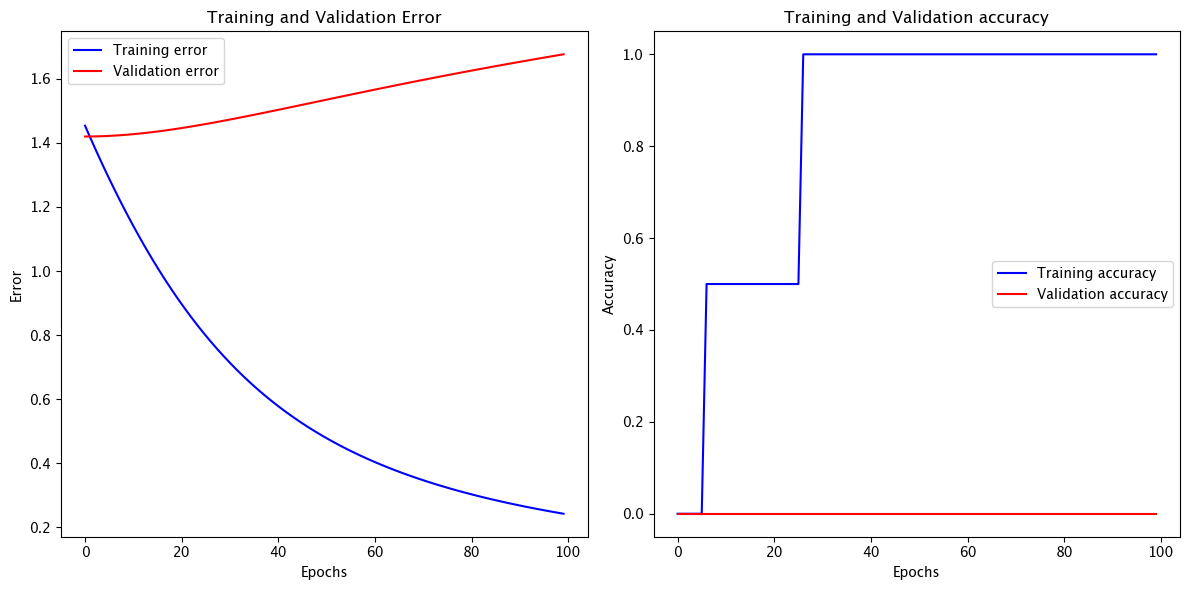

In [30]:
def test_train_loop():
    import torch.nn as nn
    import torch.optim as optim
    import torch.utils.data as data

    # init simple model, optimizer, loss_fn, dataloaders
    linear_model = nn.Linear(2, 3)
    optimizer = optim.SGD(linear_model.parameters(), lr=0.01)
    loss_fn = nn.CrossEntropyLoss()
    testing_loader_train = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )
    testing_loader_val = data.DataLoader(
        data.TensorDataset(torch.randn(2, 2), torch.randint(0, 3, (2,)))
    )

    # copy parameters to check for changes
    params_before_training = list(linear_model.parameters())
    params_before_training = [p.clone().to("cpu") for p in params_before_training]

    print("Testing training loop, CPU")
    train_model(
        model=linear_model,
        optimizer=optimizer,
        loss_fn=loss_fn,
        num_epochs=100,
        train_dataloader=testing_loader_train,
        val_dataloader=testing_loader_val,
        device="cpu",
    )
    if torch.cuda.is_available():
        print("Testing training loop, CUDA")
        train_model(
            model=linear_model,
            optimizer=optimizer,
            loss_fn=loss_fn,
            num_epochs=100,
            train_dataloader=testing_loader_train,
            val_dataloader=testing_loader_val,
            device="cuda" if torch.cuda.is_available() else "cpu",
        )

    params_after_training = list(linear_model.parameters())
    params_after_training = [p.clone().to("cpu") for p in params_after_training]
    for p_before, p_after in zip(params_before_training, params_after_training):
        assert torch.any(
            p_before != p_after
        ), "Model parameters did not change during training"

    # check that we could overfit a single example
    (x, y) = next(iter(testing_loader_train))
    x.to("cpu")
    y.to("cpu")
    linear_model.to("cpu")
    assert (
        linear_model(x).argmax().item() == y.item()
    ), "Model could not overfit a single example"


def test_accuracy():
    y_pred = torch.tensor([[0.1, 0.8, 0.1], [0.3, 0.4, 0.3], [0.1, 0.1, 0.8]])
    y_true = torch.tensor([1, 0, 2])
    acc = accuracy(y_pred, y_true)
    assert isinstance(acc, torch.Tensor), "Accuracy should be a torch.Tensor"
    assert torch.isclose(acc, torch.tensor(2 / 3)), f"Accuracy is {acc}, expected 2/3"


try:
    test_train_loop()
except Exception as e:
    print(e)
    assert False, "Training test failed, see error above"

test_accuracy()

Now, create a neural network using PyTorch. You can use any architecture you want. Save the model in the variable `model`.

In [33]:
class PokemonNN(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, output_size=3):
        super(PokemonNN, self).__init__()
        
        #Layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.fc5 = nn.Linear(hidden_size, output_size)
        # Activation function (ReLU for hidden layers)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Pass the data through the network layers with activation
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)  # Output logits for 3 classes (no activation for the output layer)
        return x
model = PokemonNN()

In [34]:
assert isinstance(model, nn.Module)


# check that we can run input of shape (batch_size, 2) through the model, with batch_size=16
def test_model_output_shape(model):
    is_model_on_cuda = next(model.parameters()).is_cuda
    device = torch.device("cuda" if is_model_on_cuda else "cpu")
    assert (
        len(model(torch.randn(16, 2, device=device))) == 16
    ), "The model should not change the batch size"


test_model_output_shape(model)

Train the network. 

For you to pass this assignment, you must obtain an accuracy on the test set greater than 60%. You can use the validation set as a proxy during development, but remember that they can differ slightly. We use the test set, as this better represents the performance of the model on new, unseen data (which is the ultimate goal).

To reach the level of performance, it may be necessary to search for a good architecture by trying several different ones. Last, if you want a challenge, try getting an accuracy greater than 75% (our reference solution achieves ~78%).

Again, it might be useful to plot the loss and accuracy (for training and validation) during training.

Epoch number: 0 Training_loss: 1.0848770141601562 Validation_loss: 1.1096450090408325
Epoch number: 0 Training_acc: 0.3741319477558136 Validation_acc: 0.3468013405799866
Epoch number: 5 Training_loss: 0.7558941841125488 Validation_loss: 0.8127320408821106
Epoch number: 5 Training_acc: 0.7022569179534912 Validation_acc: 0.6694023609161377
Epoch number: 10 Training_loss: 0.6842470765113831 Validation_loss: 0.7465882301330566
Epoch number: 10 Training_acc: 0.7317708134651184 Validation_acc: 0.695917546749115
Epoch number: 15 Training_loss: 0.6681723594665527 Validation_loss: 0.7281176447868347
Epoch number: 15 Training_acc: 0.7369791865348816 Validation_acc: 0.7091751098632812
Epoch number: 20 Training_loss: 0.6597543954849243 Validation_loss: 0.7191832661628723
Epoch number: 20 Training_acc: 0.7378472089767456 Validation_acc: 0.7091751098632812
Epoch number: 25 Training_loss: 0.6529380083084106 Validation_loss: 0.7098762392997742
Epoch number: 25 Training_acc: 0.7395833134651184 Validati

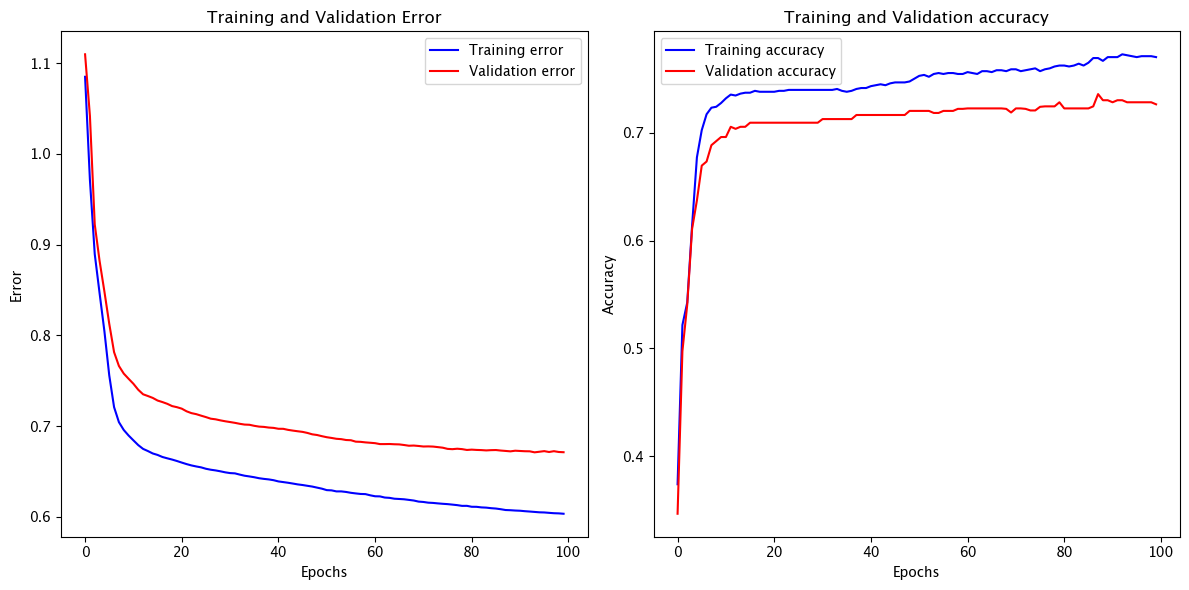

Test accuracy: tensor(0.7207)


In [35]:
model = PokemonNN()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
train_model(
    model=model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu",
    )
acc_test = 0
test_num_batches = len(loader_test) 
for batch in loader_test:
    inputs, targets = batch
    outputs = model(inputs)
    acc_test = acc_test + accuracy(outputs, targets)

acc_test = acc_test/test_num_batches
print("Test accuracy: " + str(acc_test))

Let's have a look at what we have learned! Create a function that visualizes the decision regions of the network. Overlap it with the points corresponding to the training data and validations data, such as in Section 2, by using the scatter plot function. The training and validation points should have different markers and/or colors. Last, call the function to visualize the decision regions of your network.

Hint: A simple way to show the decision region is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

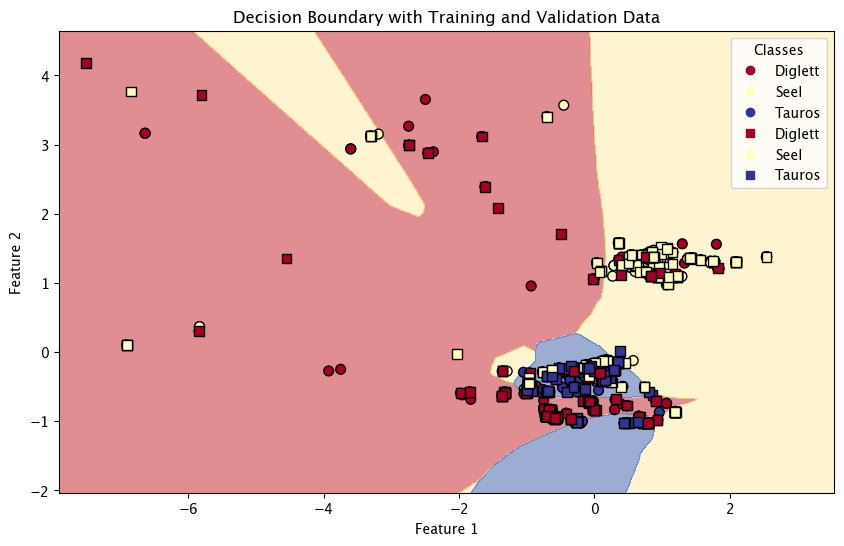

In [36]:
def plot_decision_region(model: nn.Module, x_train, y_train, x_val, y_val):
    """
    Plot the decision region of the model.

    Args:
    model: nn.Module: The trained model
    x_train: The training features, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    y_train: The training labels, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    x_val: The validation features, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    y_val: The validation labels, use whatever representation you prefer (e.g. numpy array, torch.Tensor, dataset, dataloader)
    """
    # Create a mesh grid over the feature space (assuming 2D input)
    x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
    y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Flatten the grid and convert to PyTorch tensor before passing it to the model
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

    # Get predictions on the grid
    with torch.no_grad():
        outputs = model(grid)
        predictions = torch.max(outputs, 1)[1].numpy()  # Class predictions

    # Reshape the predictions back to the grid shape
    Z = predictions.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)

    scatter1 = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, marker='o', edgecolor='k', s=50, cmap=plt.cm.RdYlBu, label="Training Data")

    # Plot the validation data points
    scatter2 = plt.scatter(x_val[:, 0], x_val[:, 1], c=y_val, marker='s', edgecolor='k', s=50, cmap=plt.cm.RdYlBu, label="Validation Data")

    # Create the legend with class labels
    handles1, labels1 = scatter1.legend_elements(prop="colors")
    handles2, labels2 = scatter2.legend_elements(prop="colors")
    class_labels = ['Diglett', 'Seel', 'Tauros']
    # Combine handles and labels from both scatter plots
    handles = handles1 + handles2
    labels = class_labels * 2  # Repeat class labels for training and validation
    plt.legend(handles, labels, title="Classes")

   

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary with Training and Validation Data')
    plt.show()

def dataloader_to_numpy(dataloader):
    # Lists to store inputs and labels
    all_inputs = []
    all_labels = []
    
    # Loop through the dataloader
    for inputs, labels in dataloader:
        # Move tensors to CPU if they're on GPU and convert them to numpy arrays
        all_inputs.append(inputs)
        all_labels.append(labels)
    
    # Concatenate all batches into single numpy arrays
    all_inputs = np.concatenate(all_inputs, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    
    return all_inputs, all_labels
x_train, y_train =  dataloader_to_numpy(loader_train)
x_val, y_val = dataloader_to_numpy(loader_val)
plot_decision_region(model, x_train, y_train, x_val, y_val)

Do the learned decision regions look like you would expect? Can they be improved? In what sense, and how would that change your model? Please comment on your results. 

**Your answer:** The model performs as anticipated. With multiple layers and 16 neurons per layer, it is designed to capture "non-linear" decision boundaries effectively. The round markers represent the training set, and it appears the network has successfully learned to classify most of the easily separable points, with a few exceptions, particularly, the upper left boundary could likely be refined. In the more densely packed regions, it is challenging to pinpoint specific improvements, but there is room for further optimization.

### 4.1. Model capacity and generalization

Now we have all the neccessary tools to do a small experiment on model capacity and implications on generalization.

Begin by defining a neural network `tiny_model` with a single linear layer and appropriate activation function. Then, train the network until convergence (should be fast).

Epoch number: 0 Training_loss: 1.0545899868011475 Validation_loss: 1.2598470449447632
Epoch number: 0 Training_acc: 0.4409722089767456 Validation_acc: 0.3817340135574341
Epoch number: 5 Training_loss: 0.8972278237342834 Validation_loss: 0.9218572974205017
Epoch number: 5 Training_acc: 0.4678819477558136 Validation_acc: 0.47558924555778503
Epoch number: 10 Training_loss: 0.8973071575164795 Validation_loss: 0.9228464365005493
Epoch number: 10 Training_acc: 0.4774305522441864 Validation_acc: 0.47558924555778503
Epoch number: 15 Training_loss: 0.8973674774169922 Validation_loss: 0.9228765368461609
Epoch number: 15 Training_acc: 0.4774305522441864 Validation_acc: 0.47558924555778503
Epoch number: 20 Training_loss: 0.8973989486694336 Validation_loss: 0.9228806495666504
Epoch number: 20 Training_acc: 0.4765625 Validation_acc: 0.47558924555778503
Epoch number: 25 Training_loss: 0.8974168300628662 Validation_loss: 0.9228826761245728
Epoch number: 25 Training_acc: 0.4765625 Validation_acc: 0.475

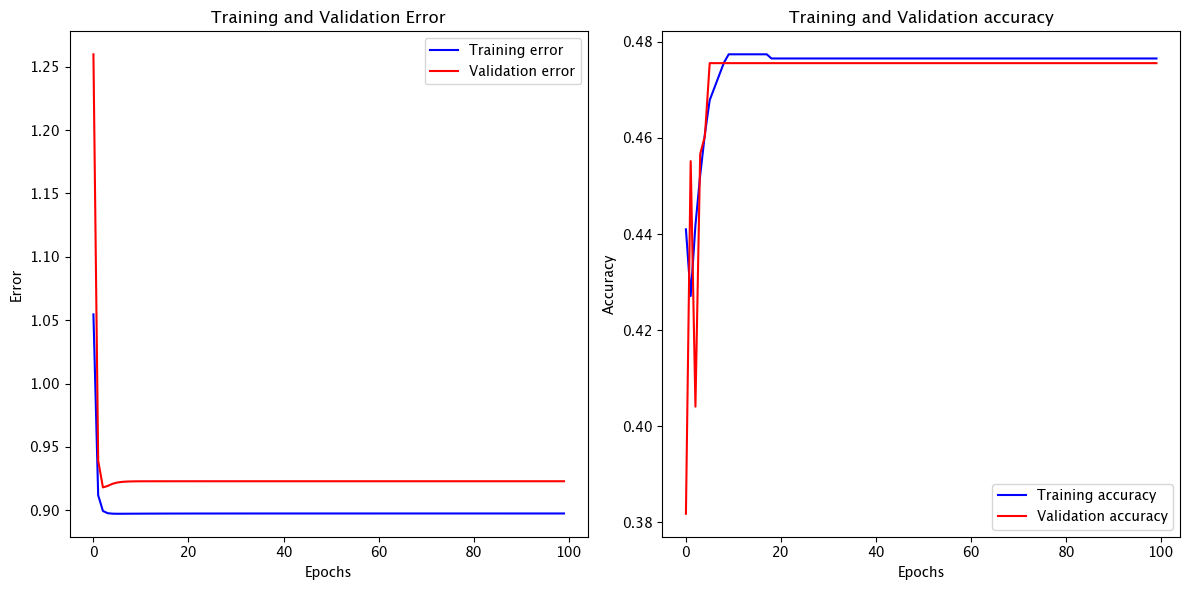

Test accuracy: tensor(0.4637)


In [37]:
# YOUR CODE HERE
class TinyModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=16, output_size=3):
        super(TinyModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        
        self.f1 = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.f1(x)
        return x


tiny_model = TinyModel()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(tiny_model.parameters(), lr=0.01)
train_model(
    model=tiny_model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu",
    )
acc_test = 0
test_num_batches = len(loader_test) 
for batch in loader_test:
    inputs, targets = batch
    outputs = tiny_model(inputs)
    acc_test = acc_test + accuracy(outputs, targets)

acc_test = acc_test/test_num_batches
print("Test accuracy: " + str(acc_test))


In [38]:
assert isinstance(tiny_model, nn.Module), "tiny_model should be a torch.nn.Module"
test_model_output_shape(tiny_model)

Now, draw the decision regions of the network as you did in the previous section. Before running the code, think about what you expect to see. What will the regions look like? How will they differ from the previous ones?

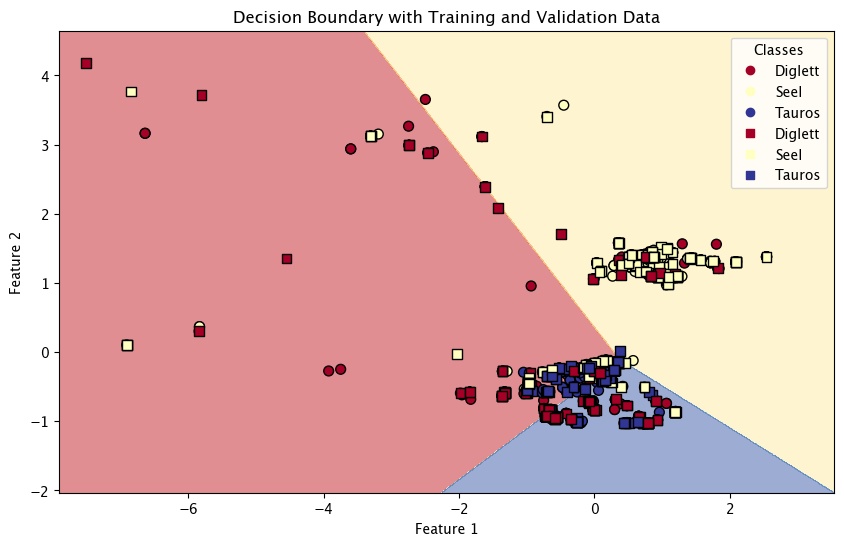

In [39]:
plot_decision_region(tiny_model, x_train, y_train, x_val, y_val)

Are the decision regions any different? Why/why not? What does this tell you about the model capacity and generalization?

**Your answer:** The decision boundaries are linear, which is expected given that our model consists of a single layer without any non-linear activation functions. This limitation significantly reduces the model’s capacity and generalization ability, as the linear boundaries are less adaptable to complex patterns in the data.

Next, create a neural network `large_model` with many layers and/or hidden units. Try to maximize the training accuracy (0.7-0.8). Getting these models to converge might be a bit tricky, so you might have to adjust the learning rate, the optimizer, etc. Also, might be easier to have a wide model (large number of hidden units, say 1024 per layer) than a deep model (more than 4 layers).

Feel free to experiment, but if you get stuck, our model is a MLP with an input layer, 4 hidden layers with 1024 units each, and an output layer. We used the ReLU activation function between each layer and a softmax for the output layer. We used the Adam optimizer with a learning rate of 0.003 and a batch size of 512. We trained for at least a few hundred epochs. Also, normalizing the input can be helpful (zero mean and unit variance).

Epoch number: 0 Training_loss: 0.8324018120765686 Validation_loss: 1.0990991592407227
Epoch number: 0 Training_acc: 0.6380208134651184 Validation_acc: 0.3211279511451721
Epoch number: 5 Training_loss: 0.6764262318611145 Validation_loss: 0.704423189163208
Epoch number: 5 Training_acc: 0.7404513955116272 Validation_acc: 0.7133837938308716
Epoch number: 10 Training_loss: 0.6441641449928284 Validation_loss: 0.6842594742774963
Epoch number: 10 Training_acc: 0.7552083134651184 Validation_acc: 0.7266414165496826
Epoch number: 15 Training_loss: 0.6256760358810425 Validation_loss: 0.6715862154960632
Epoch number: 15 Training_acc: 0.765625 Validation_acc: 0.7398989796638489
Epoch number: 20 Training_loss: 0.6141915917396545 Validation_loss: 0.6663908958435059
Epoch number: 20 Training_acc: 0.765625 Validation_acc: 0.7285353541374207
Epoch number: 25 Training_loss: 0.6014371514320374 Validation_loss: 0.6767396926879883
Epoch number: 25 Training_acc: 0.7734375 Validation_acc: 0.7205387353897095
Ep

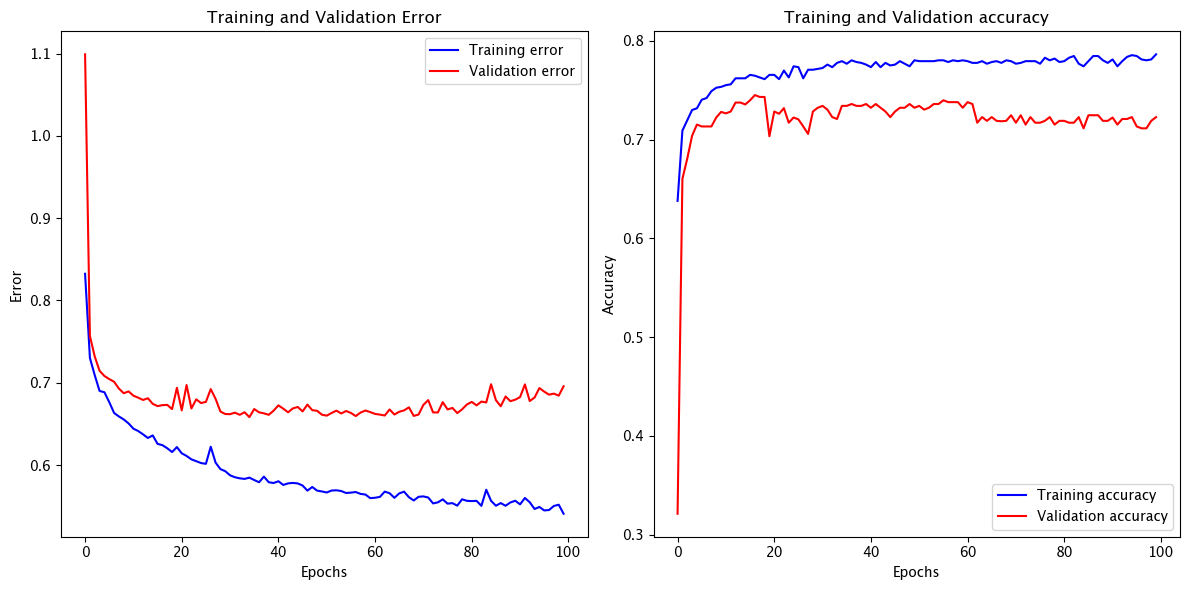

Test accuracy: tensor(0.6790)


In [40]:
class LargeModel(nn.Module):
    def __init__(self, input_size=2, hidden_size=1024, output_size=3):
        super(LargeModel, self).__init__()
        
        # Input layer -> Hidden layer 1
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        # Hidden layer 1 -> Hidden layer 2
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        
        # Hidden layer 2 -> Output layer
        self.fc3 = nn.Linear(hidden_size, hidden_size)

        self.fc4 = nn.Linear(hidden_size, output_size)
        # Activation function (ReLU for hidden layers)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Pass the data through the network layers with activation
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        # Output logits for 3 classes (no activation for the output layer)
        return x

large_model = LargeModel()

optimizer = torch.optim.Adam(large_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
train_model(
    model=large_model,
    optimizer=optimizer,
    loss_fn=loss_fn,
    num_epochs=100,
    train_dataloader=loader_train,
    val_dataloader=loader_val,
    device="cpu",
    )
acc_test = 0
test_num_batches = len(loader_test) 
for batch in loader_test:
    inputs, targets = batch
    outputs = large_model(inputs)
    acc_test = acc_test + accuracy(outputs, targets)

acc_test = acc_test/test_num_batches
print("Test accuracy: " + str(acc_test))

In [41]:
assert isinstance(large_model, nn.Module), "large_model should be a torch.nn.Module"
test_model_output_shape(large_model)

Again, draw the decision regions of the network. What do you expect to see now? How will the regions differ from the previous ones?

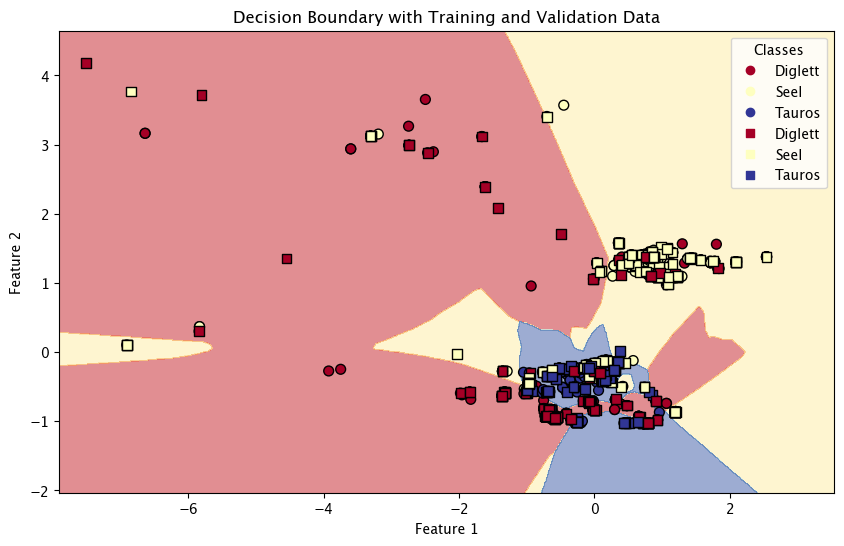

In [42]:
plot_decision_region(large_model, x_train, y_train, x_val, y_val)

How do the decision regions differ between the tiny, large and the network you trained? Can you explain why this happens? Relate your answer to the concepts you learned in the first lectures.

**Your answer:** The key distinction between the tiny network and the large network lies in their ability to model decision boundaries. The larger network can create more complex, "non-linear" decision boundaries due to its greater capacity. Specifically, the primary difference between my network and the larger one is the number of neurons. An increased number of neurons enables the network to draw more lines, which translates to the ability to form more intricate and smoother decision boundaries.

## 5. Evaluation

Back to your original model. Once you achieved at least 60% accuracy in the validation set with your main model, we are done with its training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [43]:
main_model_test_accuracy = 0
test_num_batches = len(loader_test)
outputs_test = []
for i, batch in enumerate(loader_test):
    inputs, targets = batch
    outputs = model(inputs)
    outputs_test.append(outputs)
    main_model_test_accuracy = main_model_test_accuracy + accuracy(outputs, targets)

main_model_test_accuracy = main_model_test_accuracy/test_num_batches
print(f"Test accuracy: {main_model_test_accuracy:.3f}.")

Test accuracy: 0.721.


In [44]:
assert main_model_test_accuracy > 0.6

Most likely, you'll get a different (slightly worse) accuracy than the one you got on the validation set. Why is this? Also, why do we need both a test and validation set?

**Your answer:** The test accuracy was not used to tune our model, so we expect it to perform slightly worse on unseen data. Both test and validation sets are necessary to assess how the model performs on data it hasn't been trained on, helping us evaluate how well it generalizes. The test set is crucial for evaluating performance, as new data passed through the network during real-world use will not have been considered during training.

Next, compute the confusion matrix of your predictions on the test set and save it as `conf_mat`.

In [45]:
x_test, y_test =  dataloader_to_numpy(loader_test)
y_pred = model(torch.from_numpy(x_test))
y_pred = torch.argmax(y_pred, dim=1)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[ 90  28  28]
 [ 11  95  34]
 [ 17   1 118]]


In [46]:
assert isinstance(conf_mat, np.ndarray) or isinstance(
    conf_mat, torch.Tensor
), "conf_mat should be a numpy array or torch.Tensor"
assert conf_mat.shape == (3, 3), "conf_mat should have shape (3, 3), i.e. 3 classes"
assert np.sum(conf_mat) == len(
    dataset_test
), "conf_mat should sum up to the number of test samples"

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** That all classes seem quite entagled. The accuracy is good but not great, and there is a big overlap between classes. 

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** 
By plotting the decision regions created by your neural network, you can visually identify areas where different Pokémon are likely to be found. Regions where all three decision boundaries intersect would be ideal for capturing all Pokemon in a single trip.


Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** Variables related to month and year are likely relevant to determine whether the Pokémon still spawns today and/or if its appearance is seasonal.

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

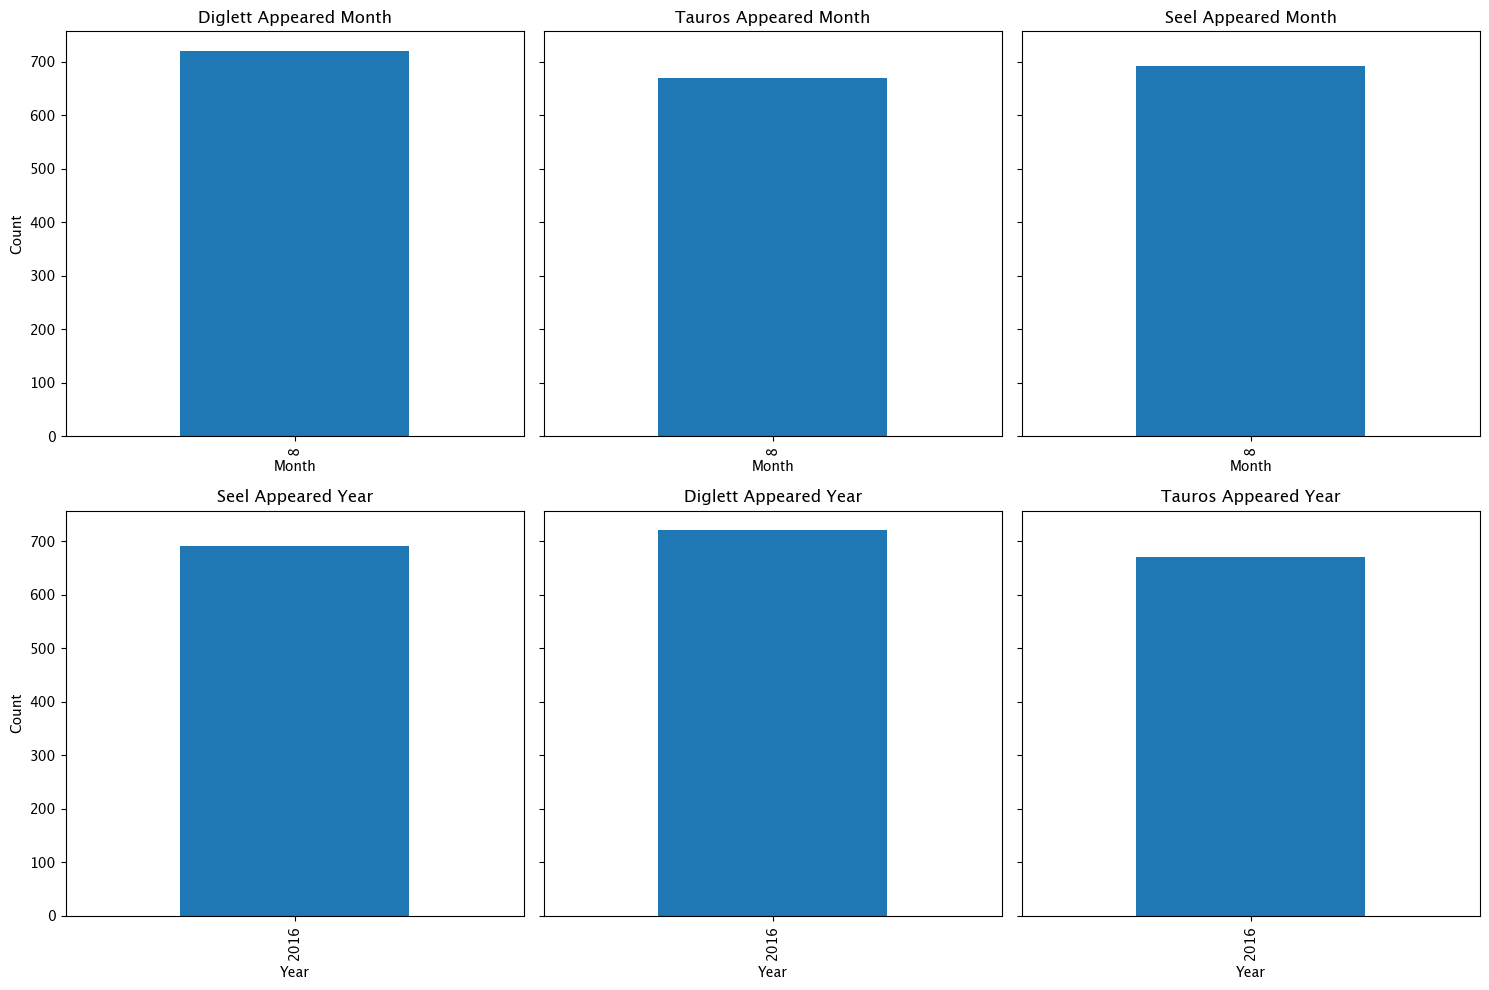

In [48]:
# YOUR CODE HERE
diglett_df = df_hist[df_hist['name'] == "Diglett"]
seel_df = df_hist[df_hist['name'] == "Seel"]
tauros_df = df_hist[df_hist['name'] == "Tauros"]
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharey='row')

# Plot for Diglett - Appeared Month
diglett_df['appearedMonth'].value_counts(sort=False).plot.bar(ax=axs[0, 0])
axs[0, 0].set_title('Diglett Appeared Month')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Count')

# Plot for Diglett - Appeared Year
diglett_df['appearedYear'].value_counts(sort=False).plot.bar(ax=axs[1, 1])
axs[1, 1].set_title('Diglett Appeared Year')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Count')

# Plot for Seel - Appeared Month
seel_df['appearedMonth'].value_counts(sort=False).plot.bar(ax=axs[0, 2])
axs[0, 2].set_title('Seel Appeared Month')
axs[0, 2].set_xlabel('Month')
axs[0, 2].set_ylabel('Count')

# Plot for Seel - Appeared Year
seel_df['appearedYear'].value_counts(sort=False).plot.bar(ax=axs[1, 0])
axs[1, 0].set_title('Seel Appeared Year')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Count')

# Plot for Tauros - Appeared Month
tauros_df['appearedMonth'].value_counts(sort=False).plot.bar(ax=axs[0, 1])
axs[0, 1].set_title('Tauros Appeared Month')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Count')

# Plot for Tauros - Appeared Year
tauros_df['appearedYear'].value_counts(sort=False).plot.bar(ax=axs[1, 2])
axs[1, 2].set_title('Tauros Appeared Year')
axs[1, 2].set_xlabel('Year')
axs[1, 2].set_ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Show all plots
plt.show()

What does/do this/these histogram(s) show you? Could it be beneficial to add this/these new feature(s) as input? Explain why/why not.

**Your answer:** The histogram shows that all datapoints were collected under the same month 2016. Therefore it would not provide any additional information to our NN.

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not expect very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** In the context of finding Pokémon, localization involves identifying a region where the average distance to the Pokemon is minimized. This means you are looking for the area or specific coordinates where the Pokemon is most likely to be found based on, in this case, location. The goal is to predict precise locations or areas where the Pokémon is most probable, rather than just categorizing regions into classes.

On the other hand, a regression model may struggle in scenarios with high variance in the data. This variability can lead to predictions that are less reliable, potentially directing you to regions where Pokémon do not spawn. 

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [49]:
# YOUR CODE HERE